In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv('/content/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# to find null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# to remove unwanted columns
df = df.drop(['id'],axis=1)
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
# To convert text related column into numeric
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
226,1,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,...,11.52,19.80,73.47,395.4,0.1341,0.11530,0.02639,0.04464,0.2615,0.08269
297,0,11.760,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.03515,0.1619,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
89,1,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,0.2116,...,16.34,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473
524,1,9.847,15.68,63.00,293.2,0.09492,0.08419,0.023300,0.02416,0.1387,...,11.24,22.99,74.32,376.5,0.1419,0.22430,0.08434,0.06528,0.2502,0.09209
512,0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.1574,0.38560,0.51060,0.20510,0.3585,0.11090
39,0,13.480,20.82,88.40,559.2,0.10160,0.12550,0.106300,0.05439,0.1720,...,15.53,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710
383,1,12.390,17.48,80.64,462.9,0.10420,0.12970,0.058920,0.02880,0.1779,...,14.18,23.13,95.23,600.5,0.1427,0.35930,0.32060,0.09804,0.2819,0.11180
179,1,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
341,1,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.02292,0.2036,...,10.75,23.07,71.25,353.6,0.1233,0.34160,0.43410,0.08120,0.2982,0.09825
18,0,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.09498,0.1582,...,27.32,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615


In [ ]:
# to split the data
X=df.iloc[:, 1:]
y=df.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
y_train

,diagnosis
68,1
181,0
63,1
248,1
60,1
...,...
71,1
106,1
270,1
435,0


In [ ]:
len(X_train),len(y_train)

(455, 455)

In [ ]:
len(X_test),len(y_test)

(114, 114)

In [ ]:
# we need to give the training data to the algorithm [knn]
# so knn will break them data into 2 parts
# M related patients one part and B related patients another part


In [ ]:
y_train.value_counts()

,count
diagnosis,
1,286
0,169


In [ ]:
# To give data to the algorithm
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier()  # default k_value

In [ ]:
reg.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# train perfomance
# For single row
X_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175


In [ ]:
# to find 68 row actual value
y_train[68]

1

In [ ]:
X_train['area_mean'][68]

250.5

In [ ]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# To find 68 row prediction value
c=[]
for i in X_train.columns:
  c.append(X_train[i][68])
print(c)

[9.029, 17.33, 58.79, 250.5, 0.1066, 0.1413, 0.313, 0.04375, 0.2111, 0.08046, 0.3274, 1.194, 1.885, 17.67, 0.009549, 0.08606, 0.3038, 0.03322, 0.04197, 0.009559, 10.31, 22.65, 65.5, 324.7, 0.1482, 0.4365, 1.252, 0.175, 0.4228, 0.1175]


In [ ]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([c])

array([1])

In [ ]:
reg.predict([c])[0]

1

In [ ]:
# To find all rows prediction
y_train_pred=reg.predict(X_train)
training_data=pd.DataFrame()
training_data=X_train.copy()
training_data['y_train_values']=y_train
training_data['y_train_predictions']=y_train_pred
training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_predictions
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,1


In [ ]:
len(y_train)

455

In [ ]:
len(y_train_pred)

455

In [ ]:
training_data.index

Index([ 68, 181,  63, 248,  60,  15, 290, 137, 155, 517,
       ...
       330, 214, 466, 121,  20,  71, 106, 270, 435, 102],
      dtype='int64', length=455)

**Model Performance**

- `actual | Predict `
-    `1   |    1  =   TP`
-    `0   |    0  =   TN`
-    `0   |    1  =   FP`
-    `1   |    0  =   FN`


- `Accuracy `
    
      `tp + tn` / `tp + tn + fp + fn `

In [ ]:
TP=0
TN=0
FP=0
FN=0
for i in training_data.index:
  if training_data['y_train_values'][i] ==1 and training_data['y_train_predictions'][i] ==1:
    TP +=1
  elif training_data['y_train_values'][i] ==0 and training_data['y_train_predictions'][i] ==0:
    TN +=1
  elif training_data['y_train_values'][i] ==0 and training_data['y_train_predictions'][i] ==1:
    FP +=1
  else:
    FN +=1
print(f'True Positive count :{TP}')
print(f'True Negative count:{TN}')
print(f'False Positive count :{FP}')
print(f'False negative count:{FN}')



True Positive count :281
True Negative count:147
False Positive count :22
False negative count:5


In [ ]:
# Train accuracy
(TP+TN)/(TP+TN+FP+FN)

0.9406593406593406

In [ ]:
# using functions
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  5, 281]])

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9406593406593406

**Test performance**

In [ ]:
y_test_pred=reg.predict(X_test)
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[38,  5],
       [ 0, 71]])

In [ ]:
#Accuracy
accuracy_score(y_test,y_test_pred)

0.956140350877193

**To select beat k_value**

In [ ]:
k_value=np.arange(3,50,2)
test_accuracy=[]
for i in k_value:
  reg=KNeighborsClassifier(n_neighbors=i)
  reg.fit(X_train,y_train)
  test_accuracy.append(reg.score(X_test,y_test))

In [ ]:
test_accuracy

[0.9298245614035088,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9824561403508771,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

In [ ]:
max(test_accuracy)

0.9824561403508771

In [ ]:
test_accuracy.index(max(test_accuracy))

4

In [ ]:
k_value[test_accuracy.index(max(test_accuracy))]

11

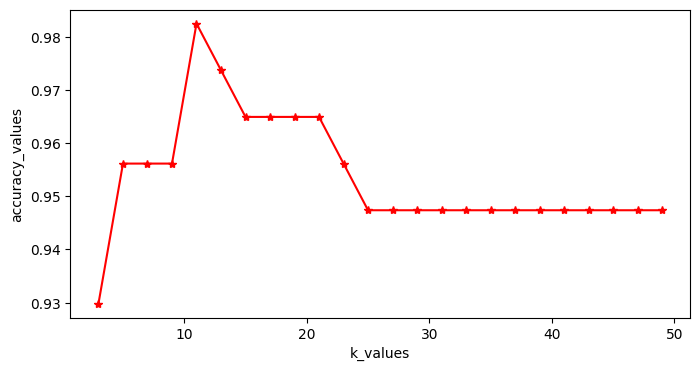

In [ ]:
# using Graph to easily indentify the best k_value
plt.figure(figsize=(8,4))
plt.xlabel('k_values')
plt.ylabel('accuracy_values')
plt.plot(k_value,test_accuracy,color = 'r',marker='*')
plt.show()

**with Best K_value=11**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier(n_neighbors=11) # to give best k_value
reg.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

**Train performance**

In [ ]:
y_train_pred=reg.predict(X_train)
training_data=pd.DataFrame()
training_data=X_train.copy()
training_data['y_train_values']=y_train
training_data['y_train_predictions']=y_train_pred
training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_predictions
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,0


In [ ]:
len(y_train)

455

In [ ]:
len(y_train_pred)

455

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  9, 277]])

In [ ]:
# To find accuracy
accuracy_score(y_train,y_train_pred)

0.9318681318681319

**Clssification_report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       169
           1       0.93      0.98      0.95       286

    accuracy                           0.94       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



**Test performance**

In [ ]:
y_test_pred=reg.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[41,  2],
       [ 0, 71]])

In [ ]:
accuracy_score(y_test,y_test_pred)

0.9824561403508771

**Clssification_report**

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

